In [9]:
import numpy
import noise
from matplotlib import pyplot

%matplotlib nbagg

In [234]:
def gen_noise(freq = 64, sizex=256, sizey=256, sizez=256):
    
    val = numpy.empty((sizex, sizey, sizez))
    
    for xi in range(sizex):
        for yi in range(sizey):
            for zi in range(sizez):
                phase = zi/sizez*freq
                val[xi, yi, zi] = noise.snoise2(xi/sizex*freq, yi/sizey*freq,
                                                repeatx=freq, repeaty=freq,
                                                base=numpy.cos(2*numpy.pi*zi/sizez))
                
    z = numpy.arange(sizez)
    magic = numpy.cos(108*val+2*numpy.pi*z/sizez)
    return magic

In [236]:
v = numpy.cos(gen_noise(4, 256, 256, 256))
for i in range(v.shape[-1]):
    pyplot.imsave("psi_frames/frame_{:05d}.png".format(i), v[:, :, i], cmap="Greys")

<IPython.core.display.Javascript object>


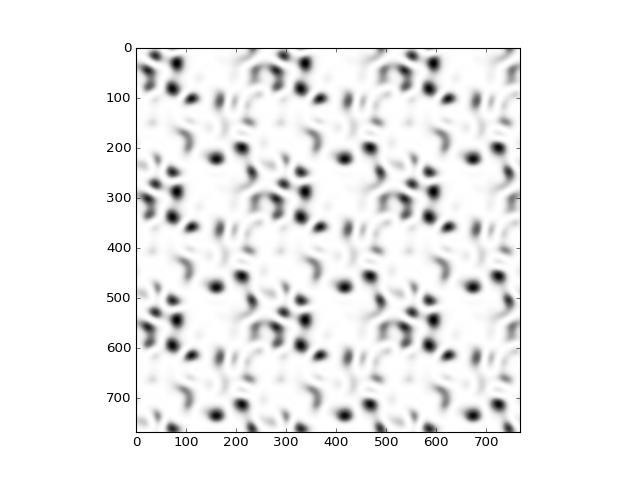

In [222]:
fig, ax = pyplot.subplots()
ax.imshow(numpy.tile(v[:, :, 0], (3,3)), cmap="Greys")

In [90]:
from noise import pnoise2, snoise2

a = numpy.empty((256,256))

octaves = 1
freq = 16.0 * octaves

for y in range(256):
    for x in range(256):
        a[x,y]=snoise2(x / freq, y / freq, octaves, repeatx=freq, repeaty=freq)

<IPython.core.display.Javascript object>


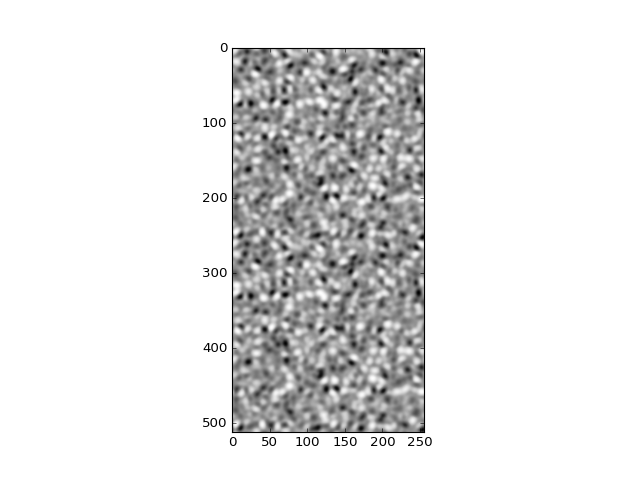

In [93]:
fig, ax = pyplot.subplots()
ax.imshow(numpy.concatenate((a, a)), cmap="Greys")